In [9]:
import pandas as pd
import numpy as np 
import glob

DATASET_LOCATION="dataset/titanic_dataset/"

In [10]:
glob.glob(DATASET_LOCATION + "*.csv")

['dataset/titanic_dataset\\gender_submission.csv',
 'dataset/titanic_dataset\\test.csv',
 'dataset/titanic_dataset\\train.csv']

In [11]:
files=[ 'dataset/titanic_dataset\\test.csv',
 'dataset/titanic_dataset\\train.csv']

In [20]:
df_list=[]

for file in files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)
df = pd.concat(df_list, axis=0, ignore_index=True)
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [24]:
print(df.shape)

(1309, 12)


In [25]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [27]:
df.PassengerId.value_counts()

892    1
443    1
461    1
460    1
459    1
      ..
18     1
17     1
16     1
15     1
891    1
Name: PassengerId, Length: 1309, dtype: int64

In [28]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object

In [29]:
string_columns= df.dtypes.loc[df.dtypes =='object'].index.to_list()
numeric_columns= df.dtypes.loc[df.dtypes !='object'].index.to_list()

In [31]:
df.loc[:, numeric_columns].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,892,3,34.5,0,0,7.8292,NaN
1,893,3,47.0,1,0,7.0000,NaN
2,894,2,62.0,0,0,9.6875,NaN
3,895,3,27.0,0,0,8.6625,NaN
4,896,3,22.0,1,1,12.2875,NaN


In [32]:
df.loc[:, string_columns].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S


In [39]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts >0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"]= (nan_counts_sorted.counts*100)/df.shape[0]
nan_counts_sorted

,counts,percentage
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


In [40]:
df.loc[:, numeric_columns].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [41]:
df.loc[:, string_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [42]:
df.Survived.isna().sum()

418

In [46]:
df = df.loc[df.Survived.notna(), :]
df.shape

(891, 12)

<AxesSubplot: >

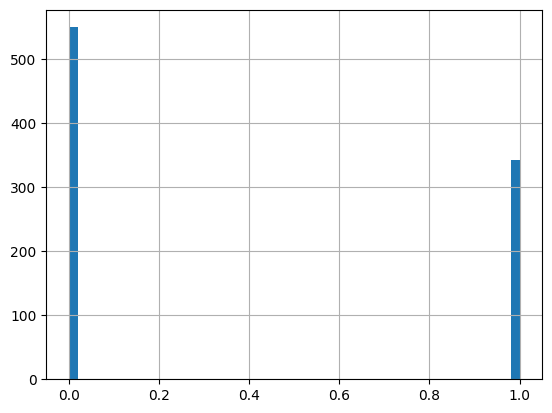

In [44]:
df.Survived.hist(bins=50)

In [59]:
df.head()
df['Sex'].unique()
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
418,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
419,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0
420,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
421,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0
422,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [60]:
corr_df=pd.DataFrame()
corr_df["pearson"]=df.corr(method="pearson")['Survived'].sort_values()
corr_df

C:\Users\jakub\AppData\Local\Temp\ipykernel_13932\3250389034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df["pearson"]=df.corr(method="pearson")['Survived'].sort_values()


,pearson
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
PassengerId,-0.005007
Parch,0.081629
Fare,0.257307
Sex,0.543351
Survived,1.000000


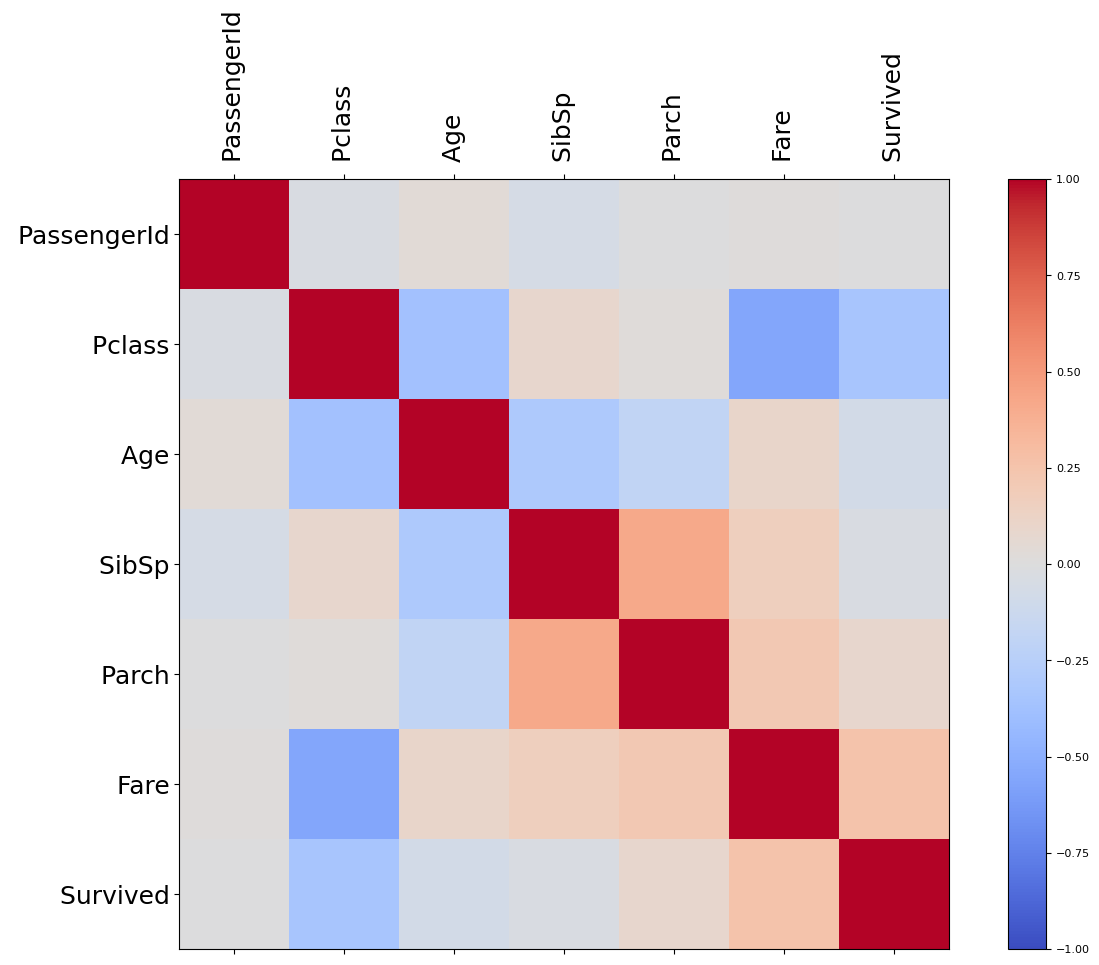

In [66]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 15, 10
dic = {"size": 8}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,numeric_columns]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

In [67]:
string_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

<AxesSubplot: title={'center': 'Fare'}, xlabel='Embarked'>

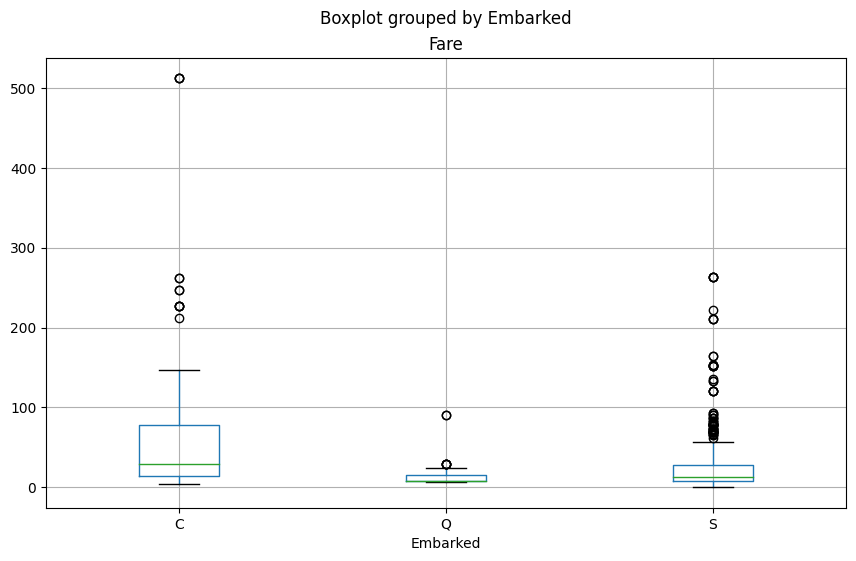

In [78]:
plt.rcParams['figure.figsize'] = 10, 6
dic = {"size": 10}
matplotlib.rc('font', **dic)

df.boxplot(column=["Fare"], by="Embarked")

<AxesSubplot: title={'center': 'Survived'}, xlabel='Fare'>

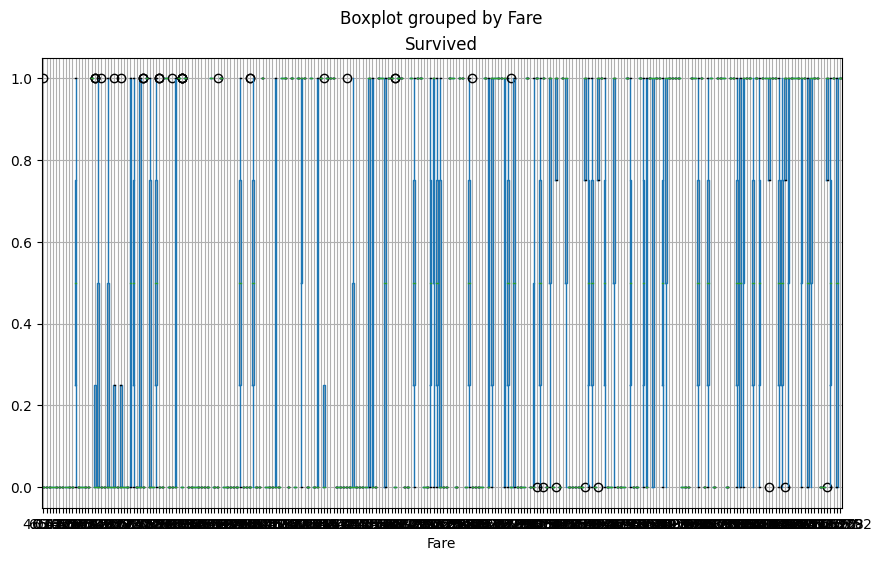

In [81]:
df.boxplot(column=["Survived"], by="Fare")

In [83]:
numeric_columns

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [84]:
df.loc[df.Survived.notna() ,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

,Pclass,Age,SibSp,Parch,Fare,Survived
418,3,22.0,1,0,7.2500,0.0
419,1,38.0,1,0,71.2833,1.0
420,3,26.0,0,0,7.9250,1.0
421,1,35.0,1,0,53.1000,1.0
422,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
1304,2,27.0,0,0,13.0000,0.0
1305,1,19.0,0,0,30.0000,1.0
1306,3,NaN,1,2,23.4500,0.0
1307,1,26.0,0,0,30.0000,1.0


In [90]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

# pip install seaborn

df_numeric = df.loc[df.Survived.notna() ,numeric_columns + ["Fare"]]
sns.pairplot(df_numeric, hue='Fare')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().